[[9.99999000e-01 1.00000000e-06 0.00000000e+00]
 [9.60674191e+01 8.41482868e-07 1.23288167e-07]
 [1.82087976e+02 8.05522762e-07 2.22314359e-07]
 [2.59922596e+02 8.66471362e-07 3.13786220e-07]
 [3.30350270e+02 1.03581869e-06 4.12010048e-07]
 [3.94075869e+02 1.36220051e-06 5.33959200e-07]
 [4.51737174e+02 1.95321690e-06 7.05270355e-07]
 [5.03911279e+02 3.02856016e-06 9.70657725e-07]
 [5.51120360e+02 5.04012654e-06 1.41450201e-06]
 [5.93836900e+02 8.94223739e-06 2.20490299e-06]
 [6.32488419e+02 1.68090730e-05 3.69063855e-06]
 [6.67461748e+02 3.33012956e-05 6.62425402e-06]
 [6.99106901e+02 6.91791673e-05 1.26814629e-05]
 [7.27740563e+02 1.49998852e-04 2.57147170e-05]
 [7.53649240e+02 3.38119785e-04 5.48506697e-05]
 [7.77092058e+02 7.89396695e-04 1.22297967e-04]
 [7.98303193e+02 1.90246074e-03 2.83505858e-04]
 [8.17493761e+02 4.71872559e-03 6.80214205e-04]
 [8.34852716e+02 1.20123995e-02 1.68266767e-03]
 [8.50545364e+02 3.13076981e-02 4.27747680e-03]
 [8.64705561e+02 8.33492700e-02 1.114205

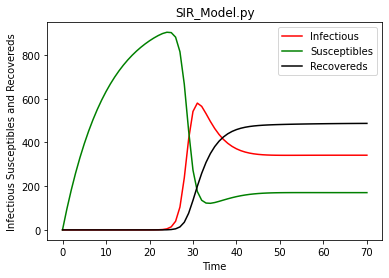

In [11]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

miu = 0.1
N=1000
beta=1.4247
gamma=0.14286
TS=1.0
ND=70.0
S0=1-1e-6
I0=1e-6
INPUT = (S0, I0, 0.0)

def diff_eqs(INP,t):
    '''The main set of equations'''
    Y=np.zeros((3))
    V = INP
    Y[0] = miu*N- beta * V[0] * V[1]/N-miu*V[0]
    Y[1] = beta * V[0] * V[1]/N - gamma * V[1]-miu*V[1]
    Y[2] = gamma * V[1]-miu*V[2]
    return Y   # For odeint
 
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)
 
print (RES)
 
#Ploting
pl.subplot(111)
pl.plot(RES[:,1], '-r', label='Infectious')
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.plot(RES[:,2], '-k', label='Recovereds')
pl.legend(loc=0)
pl.title('SIR_Model.py')
pl.xlabel('Time')
pl.ylabel('Infectious Susceptibles and Recovereds')
pl.xlabel('Time')
pl.show()

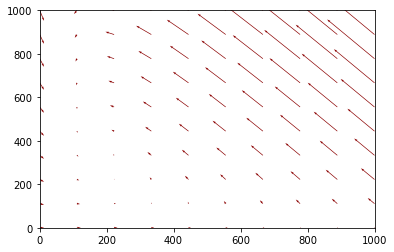

In [25]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
from plotdf import plotdf


def f(x,g=1,m=1,b=1,N=1):
    return np.array([m*N- b * x[0] * x[1]/N-m*x[0],b * x[0] * x[1]/N - g * x[1]-m*x[1]])


plotdf(f, # Function giving the rhs of the diff. eq. system
     np.array([0,1000]), # [xmin,xmax]
     np.array([0,1000]),# [ymin,ymax]

     # Additional parameters for `f` (optional)
     parameters={"g":0.14,"m":0.1,"b":1.4,'N':1000})
